# lec05. CNN(합성곱 신경망)
    - 행렬내적한 새로운 값 만들어내기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [3]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [4]:
from keras.datasets import mnist

In [5]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
y_train[:1], X_train[:1].shape, X_train[:1]

(array([5], dtype=uint8),
 (1, 28, 28),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

### 1장

In [7]:
X_train[0].shape  #[[

(28, 28)

In [8]:
# new_arr = X_train[0].reshape(-1)  # [ 
# new_arr.shape

X_train[0].reshape(-1).shape  # [ 

(784,)

In [9]:
X_train[0].flatten().shape

(784,)

### 60000만장

In [10]:
X_train.shape 

(60000, 28, 28)

In [11]:
X_train.reshape(60000, 784).shape

(60000, 784)

In [12]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [13]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)


## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [14]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

# 모델 (Neural Network, FC=full connected)

## 모델&학습

In [15]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [16]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층 아웃풋
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3230 - accuracy: 0.9055 - val_loss: 0.1601 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9657 - val_loss: 0.1036 - val_accuracy: 0.9683
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.1067 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0855 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9886 - val_loss: 0.0862 - val_accuracy: 0.9753
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0842 - val_accuracy: 0.9760
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 

In [18]:
X_train_scaler.shape

(60000, 784)

In [19]:
# X_train_scaler.reshape().shape

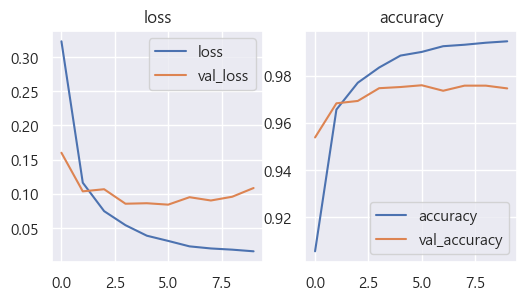

In [20]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# CNN

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_05.png" width=700>

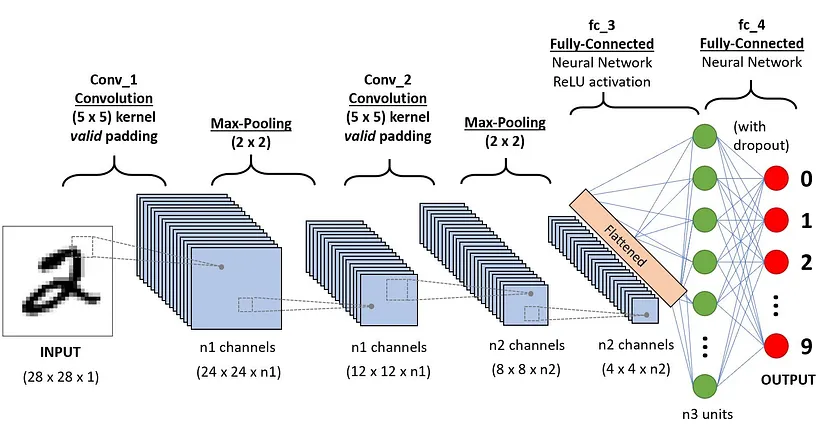

- 채널1 필터 : 16 * 16
- 채널2 필터 : 24 * 24

In [21]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense,MaxPooling2D
from keras.initializers import GlorotNormal  #Xavier

### Conv2D API
<pre>
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

### MaxPooling2D API

<pre>
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs)]

## 가중치 초기화

## Compatibility aliases (need to exist in both V1 and V2).

<pre>
LOCAL.ALL_OBJECTS["ConstantV2"] = initializers_v2.Constant
LOCAL.ALL_OBJECTS["GlorotNormalV2"] = initializers_v2.GlorotNormal
LOCAL.ALL_OBJECTS["GlorotUniformV2"] = initializers_v2.GlorotUniform
LOCAL.ALL_OBJECTS["HeNormalV2"] = initializers_v2.HeNormal
LOCAL.ALL_OBJECTS["HeUniformV2"] = initializers_v2.HeUniform
LOCAL.ALL_OBJECTS["IdentityV2"] = initializers_v2.Identity
LOCAL.ALL_OBJECTS["LecunNormalV2"] = initializers_v2.LecunNormal
LOCAL.ALL_OBJECTS["LecunUniformV2"] = initializers_v2.LecunUniform
LOCAL.ALL_OBJECTS["OnesV2"] = initializers_v2.Ones
LOCAL.ALL_OBJECTS["OrthogonalV2"] = initializers_v2.Orthogonal
LOCAL.ALL_OBJECTS["RandomNormalV2"] = initializers_v2.RandomNormal
LOCAL.ALL_OBJECTS["RandomUniformV2"] = initializers_v2.RandomUniform
LOCAL.ALL_OBJECTS["TruncatedNormalV2"] = initializers_v2.TruncatedNormal
LOCAL.ALL_OBJECTS["VarianceScalingV2"] = initializers_v2.VarianceScaling
LOCAL.ALL_OBJECTS["ZerosV2"] = initializers_v2.Zeros

In [22]:
X_train_scaler = X_train_scaler.reshape(-1,784)

In [23]:
model = Sequential()

model.add((Dense(units=300,  input_dim = 784, activation='relu'))) # 최초만 인풋값
model.add((Dense(units=100,  activation='relu')))
model.add((Dense(units=60,  activation='relu')))
model.add((Dense(units=10,  activation='softmax'))) # Output
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


#뉴럴 네트워크라고 하려면, 최소 2개의 히든 레이어가 있어야 한다. 입력-히든-아웃은 그냥 퍼셉트론..

# FN 풀 커넥티드 결과

* Fn : [0.08406875282526016, 0.9789999723434448]
* Total params: 22,862
* Trainable params: 22,862

In [24]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3036 - accuracy: 0.9117 - val_loss: 0.1486 - val_accuracy: 0.9557
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1126 - accuracy: 0.9659 - val_loss: 0.0990 - val_accuracy: 0.9703
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0992 - val_accuracy: 0.9713
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0836 - val_accuracy: 0.9770
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0964 - val_accuracy: 0.9720
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0948 - val_accuracy: 0.9746
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0896 - val_accuracy: 0.9755
Epoch 

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 60)               

# 모델 학습 평가

In [35]:
X_train_scaler.shape, X_test_scaler.shape

#60000장 수 뺀 나머지를 입력

((60000, 28, 28, 1), (10000, 784))

In [36]:
X_train_scaler = X_train_scaler.reshape(-1,28,28,1)
X_test_scaler = X_test_scaler.reshape(-1,28,28,1)
#인풋 쉐잎에 맞춰 변경하기

In [37]:
#위 그림 모형대로 모델 쌓기

model = Sequential()

#-------------------- CNN 합성곱 ------------------------
model.add(Conv2D(filters = 16,input_shape=(28,28,1),kernel_size =(5,5),strides=(1, 1),padding="valid",activation='relu',kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) #
model.add(Conv2D(filters = 16, kernel_size =(5,5), activation='relu')) #필터 사이즈. 그대로 내보내냐 변형해서 내보내냐
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) 

#------------------- Fully Connected-----------------

model.add(Flatten())
model.add((Dense(units=60,  activation='relu'))) # 히든레이어 : 복잡할 필요 없다.
model.add((Dense(units=10,  activation='softmax'))) # Output
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 60)               

In [39]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 13s 32ms/step - loss: 0.3592 - accuracy: 0.8941 - val_loss: 0.1191 - val_accuracy: 0.9647
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 3/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0710 - accuracy: 0.9774 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0664 - val_accuracy: 0.9808
Epoch 5/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0623 - val_accuracy: 0.9818
Epoch 6/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0516 - val_accuracy: 0.9854
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0534 - val_accuracy:

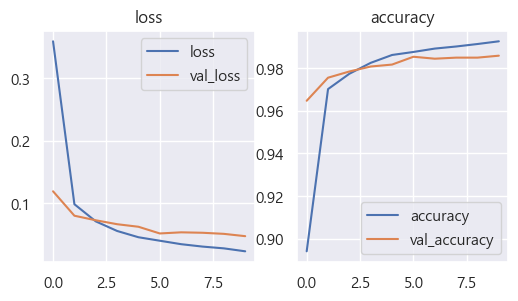

In [40]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# CNN 필터 적용 결과

 - [0.03424471244215965, 0.9889000058174133]
 * Total params: 22,862
 * Trainable params: 22,862